This Jupyter notebook provides an example on how to analyze Netlogo data with Python. It is based on Chris Davis' analysis of Netlogo data in R that can be found [here](https://cbdavis.github.io/Demo-Analyzing-Netlogo-Data-with-R/NetLogoDataDemo.html). In particular, we use the same data file.

In [36]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [37]:
# We start by reading in the file generated by Netlogo's behaviorspace.
Basecase = pd.read_csv('Segment difference_2.csv', skiprows=6, low_memory=False)
Basecasenormal = pd.read_csv('Segment difference_2.csv', skiprows=6, low_memory=False)

In [38]:
# Rename two column names
Basecase.rename(columns={'Reuse-percentage-fixed':'Reused textiles consumed [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal.rename(columns={'Reuse-percentage-fixed':'Reused textiles consumed [%]','[run number]':'run_number','[step]':'tick', 'reuse-percentage-fixed':'Reuse-percentage'}, inplace=True)
Basecasenormal['year']=Basecasenormal['tick'].div(365)
Basecase.rename(columns={'Increase-only-for-high-values?':'Increase if value > 0.5?'},inplace=True)
Basecasenormal.rename(columns={'Increase-only-for-high-values?':'Increase if value > 0.5?'},inplace=True)

In [39]:
#Basecase["Rebound?"].replace("True", "Incorporated", inplace=True, regex=True)
#Basecasenormal["Rebound?"].replace("True", "Incorporated", inplace=True, regex=True)

In [40]:
Basecase.drop(Basecase[Basecase['tick'] < 5475].index, inplace = True)

Basecase['year1']=Basecase['tick'].div(365)
Basecase['year']=Basecase['year1']-25
Basecase[0:100]

,run_number,Value-of-price-modification,Social-influence-radius,Random-seed?,Segment-influence,Rebound?,Seed,Price-influence,Social-influence-threshold,Increase if value > 0.5?,...,service-lifespan,new-consumption,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average,year1,year
30593,3,0,13,False,5,True,10,5,5,False,...,3.349983,23.794177,27.234410,1.100437,10.043668,142.2,13.8,123.6,15.000000,-10.000000
30598,3,0,13,False,5,True,10,5,5,False,...,3.346610,23.803186,27.211120,1.100437,10.043668,142.2,13.8,123.6,15.002740,-9.997260
30605,3,0,13,False,5,True,10,5,5,False,...,3.331053,23.812191,27.072692,1.098981,9.898108,142.2,13.6,123.8,15.005479,-9.994521
30612,3,0,13,False,5,True,10,5,5,False,...,3.333792,23.807833,27.094381,1.098981,9.898108,142.2,13.6,123.8,15.008219,-9.991781
30617,3,0,13,False,5,True,10,5,5,False,...,3.332322,23.803477,27.097142,1.099125,9.912536,142.0,13.6,123.6,15.010959,-9.989041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30975,3,0,13,False,5,True,10,5,5,False,...,3.401958,23.760991,27.688674,1.100865,10.086455,144.0,14.0,124.8,15.183562,-9.816438
30976,7,0,13,False,5,True,10,5,5,False,...,3.164402,25.512755,24.372336,1.055944,5.594406,153.2,8.0,135.0,15.076712,-9.923288
30979,3,0,13,False,5,True,10,5,5,False,...,3.394922,23.783104,27.630517,1.100575,10.057471,144.4,14.0,125.2,15.186301,-9.813699
30983,7,0,13,False,5,True,10,5,5,False,...,3.167142,25.508107,24.393315,1.055944,5.594406,153.2,8.0,135.0,15.079452,-9.920548


In [41]:
Basecase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761600 entries, 30593 to 3513599
Data columns (total 44 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   run_number                         int64  
 1   Value-of-price-modification        int64  
 2   Social-influence-radius            int64  
 3   Random-seed?                       bool   
 4   Segment-influence                  int64  
 5   Rebound?                           bool   
 6   Seed                               int64  
 7   Price-influence                    int64  
 8   Social-influence-threshold         int64  
 9   Increase if value > 0.5?           bool   
 10  Yearly-textile-consumption-avg     int64  
 11  Possession-span-stdev              int64  
 12  Social-influence                   float64
 13  Disposal-feedback?                 bool   
 14  Number-consumers                   int64  
 15  Lifetime-decrease-reuse            int64  
 16  Value-change  

In [42]:
Basecase['Reused textiles consumed [%]'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 30593      Current
30598      Current
30605      Current
30612      Current
30617      Current
            ...   
3513595    Current
3513596    Current
3513597    Current
3513598    Current
3513599    Current
Name: Reused textiles consumed [%], Length: 1761600, dtype: object>

In [43]:
check = np.linspace(start = 0, stop = 100, num = 100).astype(int)
Basecase_short = Basecase[Basecase['year'].isin(check)]
Basecasenormal_short = Basecasenormal[Basecasenormal['year'].isin(check)]

In [44]:
Basecase_melted = Basecase.melt(id_vars = ["reused-textiles-percentage", 'year'], value_vars = ['Value-of-price-modification', 'Value-of-environment-modification' ,'Value-of-convenience-modification'], var_name='Value-modification', value_name = 'reused_melted')
#Basecase_melted_short = Basecase_melted[Basecase_melted['year'].isin(check)]

In [45]:
Basecase_melted_short = Basecase_melted[Basecase_melted['year'].isin(check)]

In [46]:
display(Basecase_melted.head())

,reused-textiles-percentage,year,Value-modification,reused_melted
0,10.043668,-10.000000,Value-of-price-modification,0
1,10.043668,-9.997260,Value-of-price-modification,0
2,9.898108,-9.994521,Value-of-price-modification,0
3,9.898108,-9.991781,Value-of-price-modification,0
4,9.912536,-9.989041,Value-of-price-modification,0


In [47]:
Basecase['service-lifespan-1']=2*Basecase['service-lifespan']
Basecasenormal['service-lifespan-1']=2*Basecasenormal['service-lifespan']

Basecase['wears-1']=2*Basecase['wears']
Basecasenormal['wears-1']=2*Basecasenormal['wears']

# Figures not shortend

[None, None]

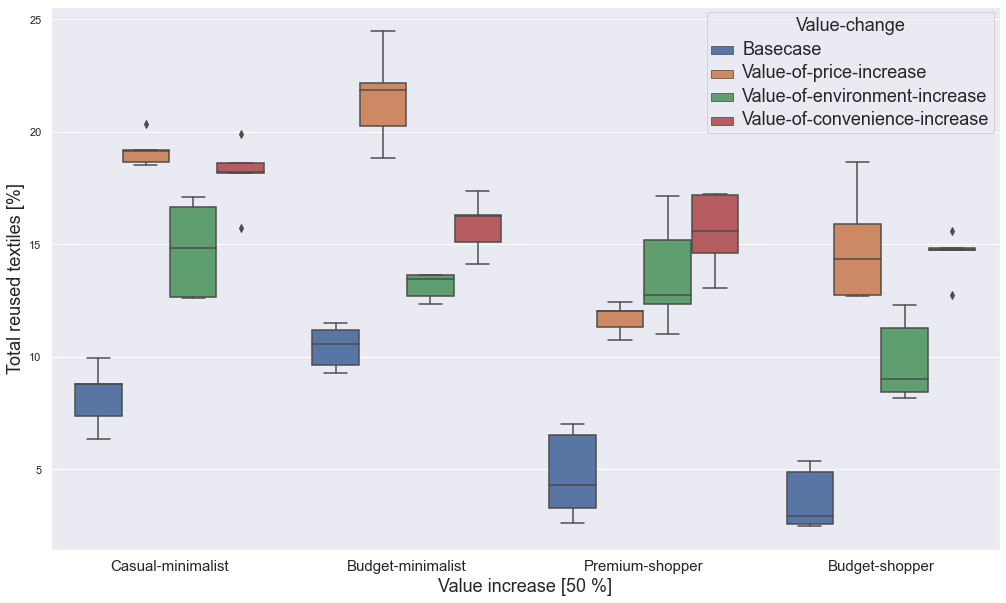

In [19]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
br = sns.boxplot(data=Basecase_short, y ='reused-textiles-percentage', x = 'Segment-distribution', hue = 'Value-change')
plt.xlabel('Value increase [50 %]', fontsize = 18)
plt.ylabel('Total reused textiles [%]', fontsize=18)
plt.xticks(np.arange(4), fontsize=15)

plt.setp(br.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(br.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

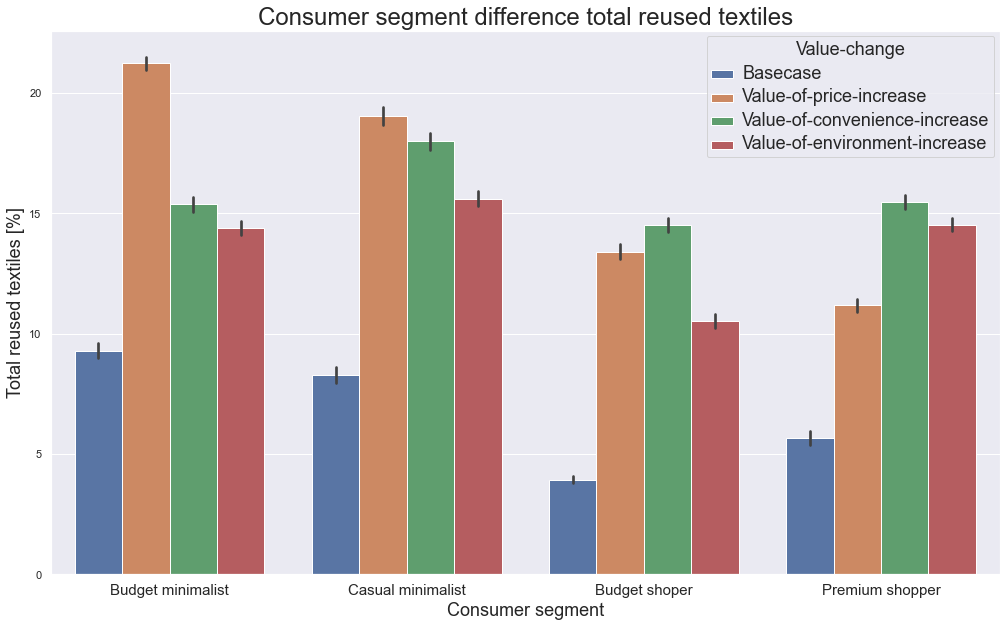

In [62]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
br = sns.barplot(data=Basecase_short, y ='reused-textiles-percentage', x = 'Segment-distribution', order = ["Budget-minimalist", "Casual-minimalist", "Budget-shopper", "Premium-shopper"], hue = 'Value-change', hue_order = ["Basecase", "Value-of-price-increase", "Value-of-convenience-increase", "Value-of-environment-increase"])

plt.xlabel('Consumer segment', fontsize = 18)
plt.ylabel('Total reused textiles [%]', fontsize=18)
plt.xticks(np.arange(4), labels = ["Budget minimalist", "Casual minimalist", "Budget shoper", "Premium shopper"], fontsize=15)
plt.title("Consumer segment difference total reused textiles", fontsize = 24)

plt.setp(br.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(br.get_legend().get_title(), fontsize='18') # for legend title

[None, None]

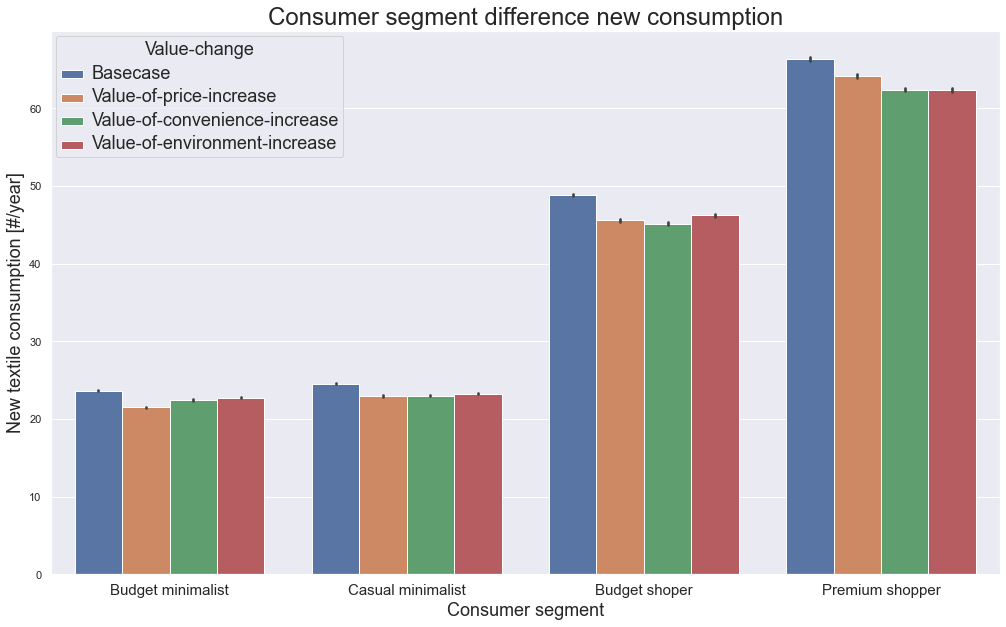

In [63]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(17,10))
br = sns.barplot(data=Basecase_short, y ='new-consumption', x = 'Segment-distribution', hue = 'Value-change', order = ["Budget-minimalist", "Casual-minimalist", "Budget-shopper", "Premium-shopper"], hue_order = ["Basecase", "Value-of-price-increase", "Value-of-convenience-increase", "Value-of-environment-increase"])

plt.xlabel('Consumer segment', fontsize = 18)
plt.ylabel('New textile consumption [#/year]', fontsize=18)
plt.xticks(np.arange(4), labels = ["Budget minimalist", "Casual minimalist", "Budget shoper", "Premium shopper"], fontsize=15)
plt.title("Consumer segment difference new consumption", fontsize = 24)

plt.setp(br.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(br.get_legend().get_title(), fontsize='18') # for legend title